In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Algerian_forest_fires_dataset.csv")

In [4]:
# See the datase loaded correctly
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire


In [5]:
df.tail(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [6]:
df.sample(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
218,2,9,2012,28,67,19,0,75.4,2.9,16.3,2,4,0.8,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
205,20,8,2012,36,81,15,0,83.7,34.4,107,3.8,38.1,9,fire


In [7]:
# Checking the size of he dataset
df.shape

(247, 14)

In [8]:
# Checking the infor of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [9]:
df.describe().T

,count,unique,top,freq
day,246,33,1,8
month,245,5,7,62
year,245,2,2012,244
Temperature,245,20,35,29
RH,245,63,64,10
Ws,245,19,14,43
Rain,245,40,0,133
FFMC,245,174,88.9,8
DMC,245,167,7.9,5
DC,245,199,8,5


In [10]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

# Data Inspection

In [11]:
df[124:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [12]:
df=df.drop(index=124)

In [13]:
df[167:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
169,15,7,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire
170,16,7,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire
171,17,7,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire
172,18,7,2012,33,68,15,0,86.1,23.9,51.6,5.2,23.9,9.1,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [14]:
df.iloc[167,9]=14.69

In [15]:
df.iloc[167,9]

14.69

In [16]:
df=df.drop(index=167)

In [17]:
df.reset_index()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [18]:
df[df["FWI"]=='fire   ']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN


In [19]:
# locating index value of FWi having value"fire"
df.loc[(df["FWI"]=="fire   ")].index

Int64Index([168], dtype='int64')

In [20]:
df=df.drop(index=168)

In [21]:
# COnverting to numeric values
df[['Temperature',' RH',' Ws','Rain ','FFMC',
       'DMC','DC','ISI','BUI','FWI']]=df[['Temperature',' RH',' Ws','Rain ','FFMC',
       'DMC','DC','ISI','BUI','FWI']].apply(pd.to_numeric)

# Data Exploration

In [22]:
# Visualising the null values in the dataset
df.isna().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        2
dtype: int64

		Visualisation of null values


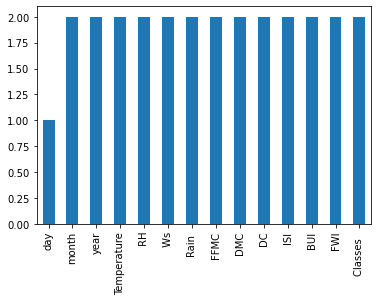

In [23]:
df.isna().sum().plot(kind='bar')
print("\t\tVisualisation of null values")

Note: Null Values are present in the feature, will handle in the preprocessing section

Text(0.5, 1.0, 'Presence of outliers in the Continous Features')

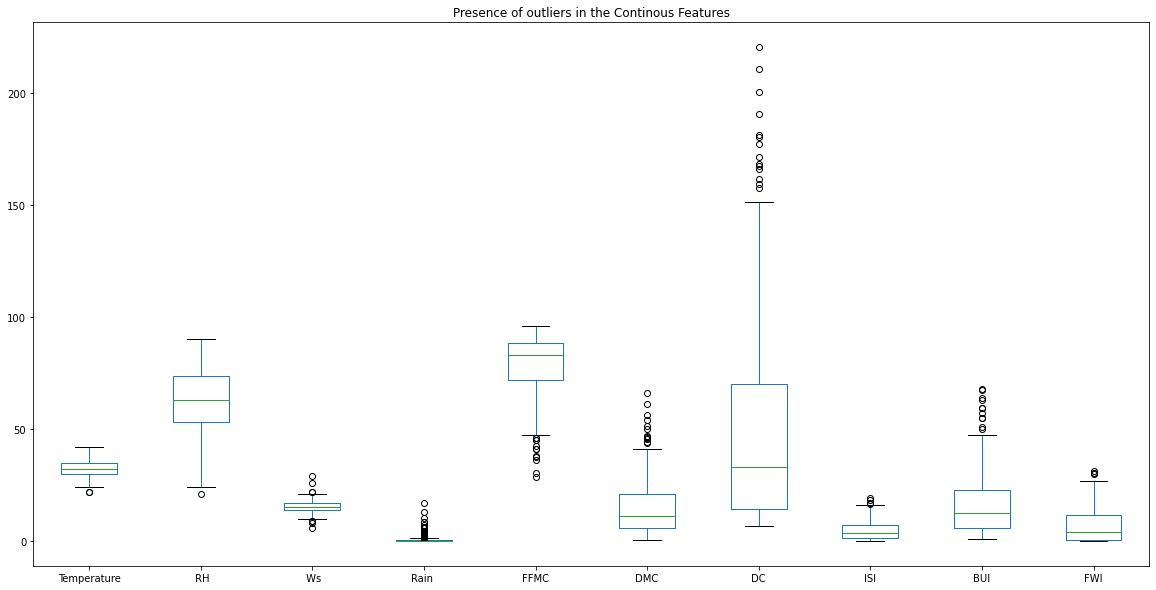

In [24]:
# Checking for the outliers
df.boxplot(['Temperature',' RH',' Ws','Rain ','FFMC',
       'DMC','DC','ISI','BUI','FWI'],figsize=(20,10),grid=False)
plt.title("Presence of outliers in the Continous Features")

Note: Outliers are presents in the features, will handle during daat pre processing section

In [25]:
#Removing the extra spaces in column names
#df.rename(columns={"Rain ":"Rain","Classes  ":"Classes"})

df.columns=df.columns.str.replace(" ","")

In [26]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [27]:
# Checking the distribution of Traget variable
df["Classes"].value_counts().index

Index(['fire   ', 'not fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '],
      dtype='object')

In [28]:
# Removing the extra spaces in class columns
df["Classes"]=df["Classes"].str.replace(" ","")

In [29]:
df["Classes"].value_counts().index

Index(['fire', 'notfire'], dtype='object')

Text(0.5, 1.0, 'Distribution of Target variable')

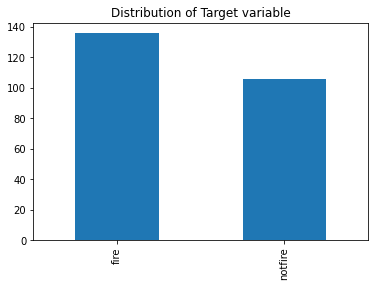

In [31]:
df["Classes"].value_counts().plot(kind="bar")
plt.title("Distribution of Target variable")

Note: From the graph , we can see that Our data set is imbalanced

Text(0.5, 1.0, 'Temperatute Variation over the year')

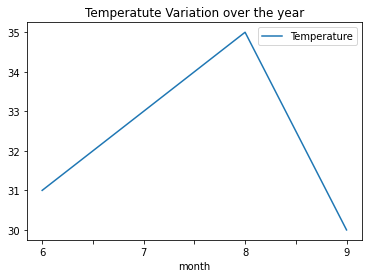

In [32]:
# Temperature variation over the years
df_temp=df.groupby("month")["Temperature"].median()
df_temp=df_temp.reset_index()
df_temp.plot(x='month',y='Temperature')
plt.title("Temperatute Variation over the year")

Note: From the graph , we can see that High temperature was during August month

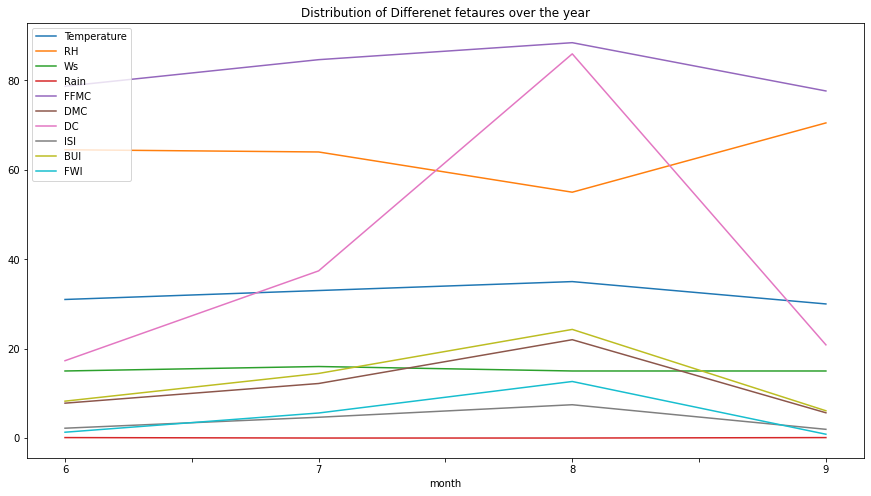

In [33]:
df_temp=df.groupby("month")['Temperature','RH','Ws','Rain','FFMC',
       'DMC','DC','ISI','BUI','FWI'].median()
df_temp=df_temp.reset_index()
df_temp.plot(x='month',y=['Temperature','RH','Ws','Rain','FFMC',
       'DMC','DC','ISI','BUI','FWI'],figsize=(15,8))
plt.title("Distribution of Differenet fetaures over the year")
plt.legend(loc="upper left")

Note: We can see that DC,FFMC,BUI,FWI & ISI were high during the august month

In [34]:
df_month=df.groupby("month")["Classes"].count()
df_month=df_month.reset_index()
df_month["Classes"]=df_month["Classes"].astype(float)
df_month

,month,Classes
0,6,60.0
1,7,60.0
2,8,62.0
3,9,60.0


In [35]:
df_month["Classes"].sum()

242.0

In [36]:
df_month["Classes"]=df_month["Classes"].apply(lambda x: round(100* x/242.0,2))

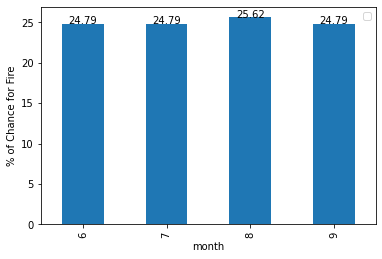

In [37]:
df_month.plot(x='month',y='Classes',kind='bar')
plt.legend('')
plt.ylabel("% of Chance for Fire")
#plt.text(x=df_month["month"],y=df_month["Classes"],s="")


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
addlabels(df_month["month"], df_month["Classes"])

Note:Chance of Fire is more in August than other Months

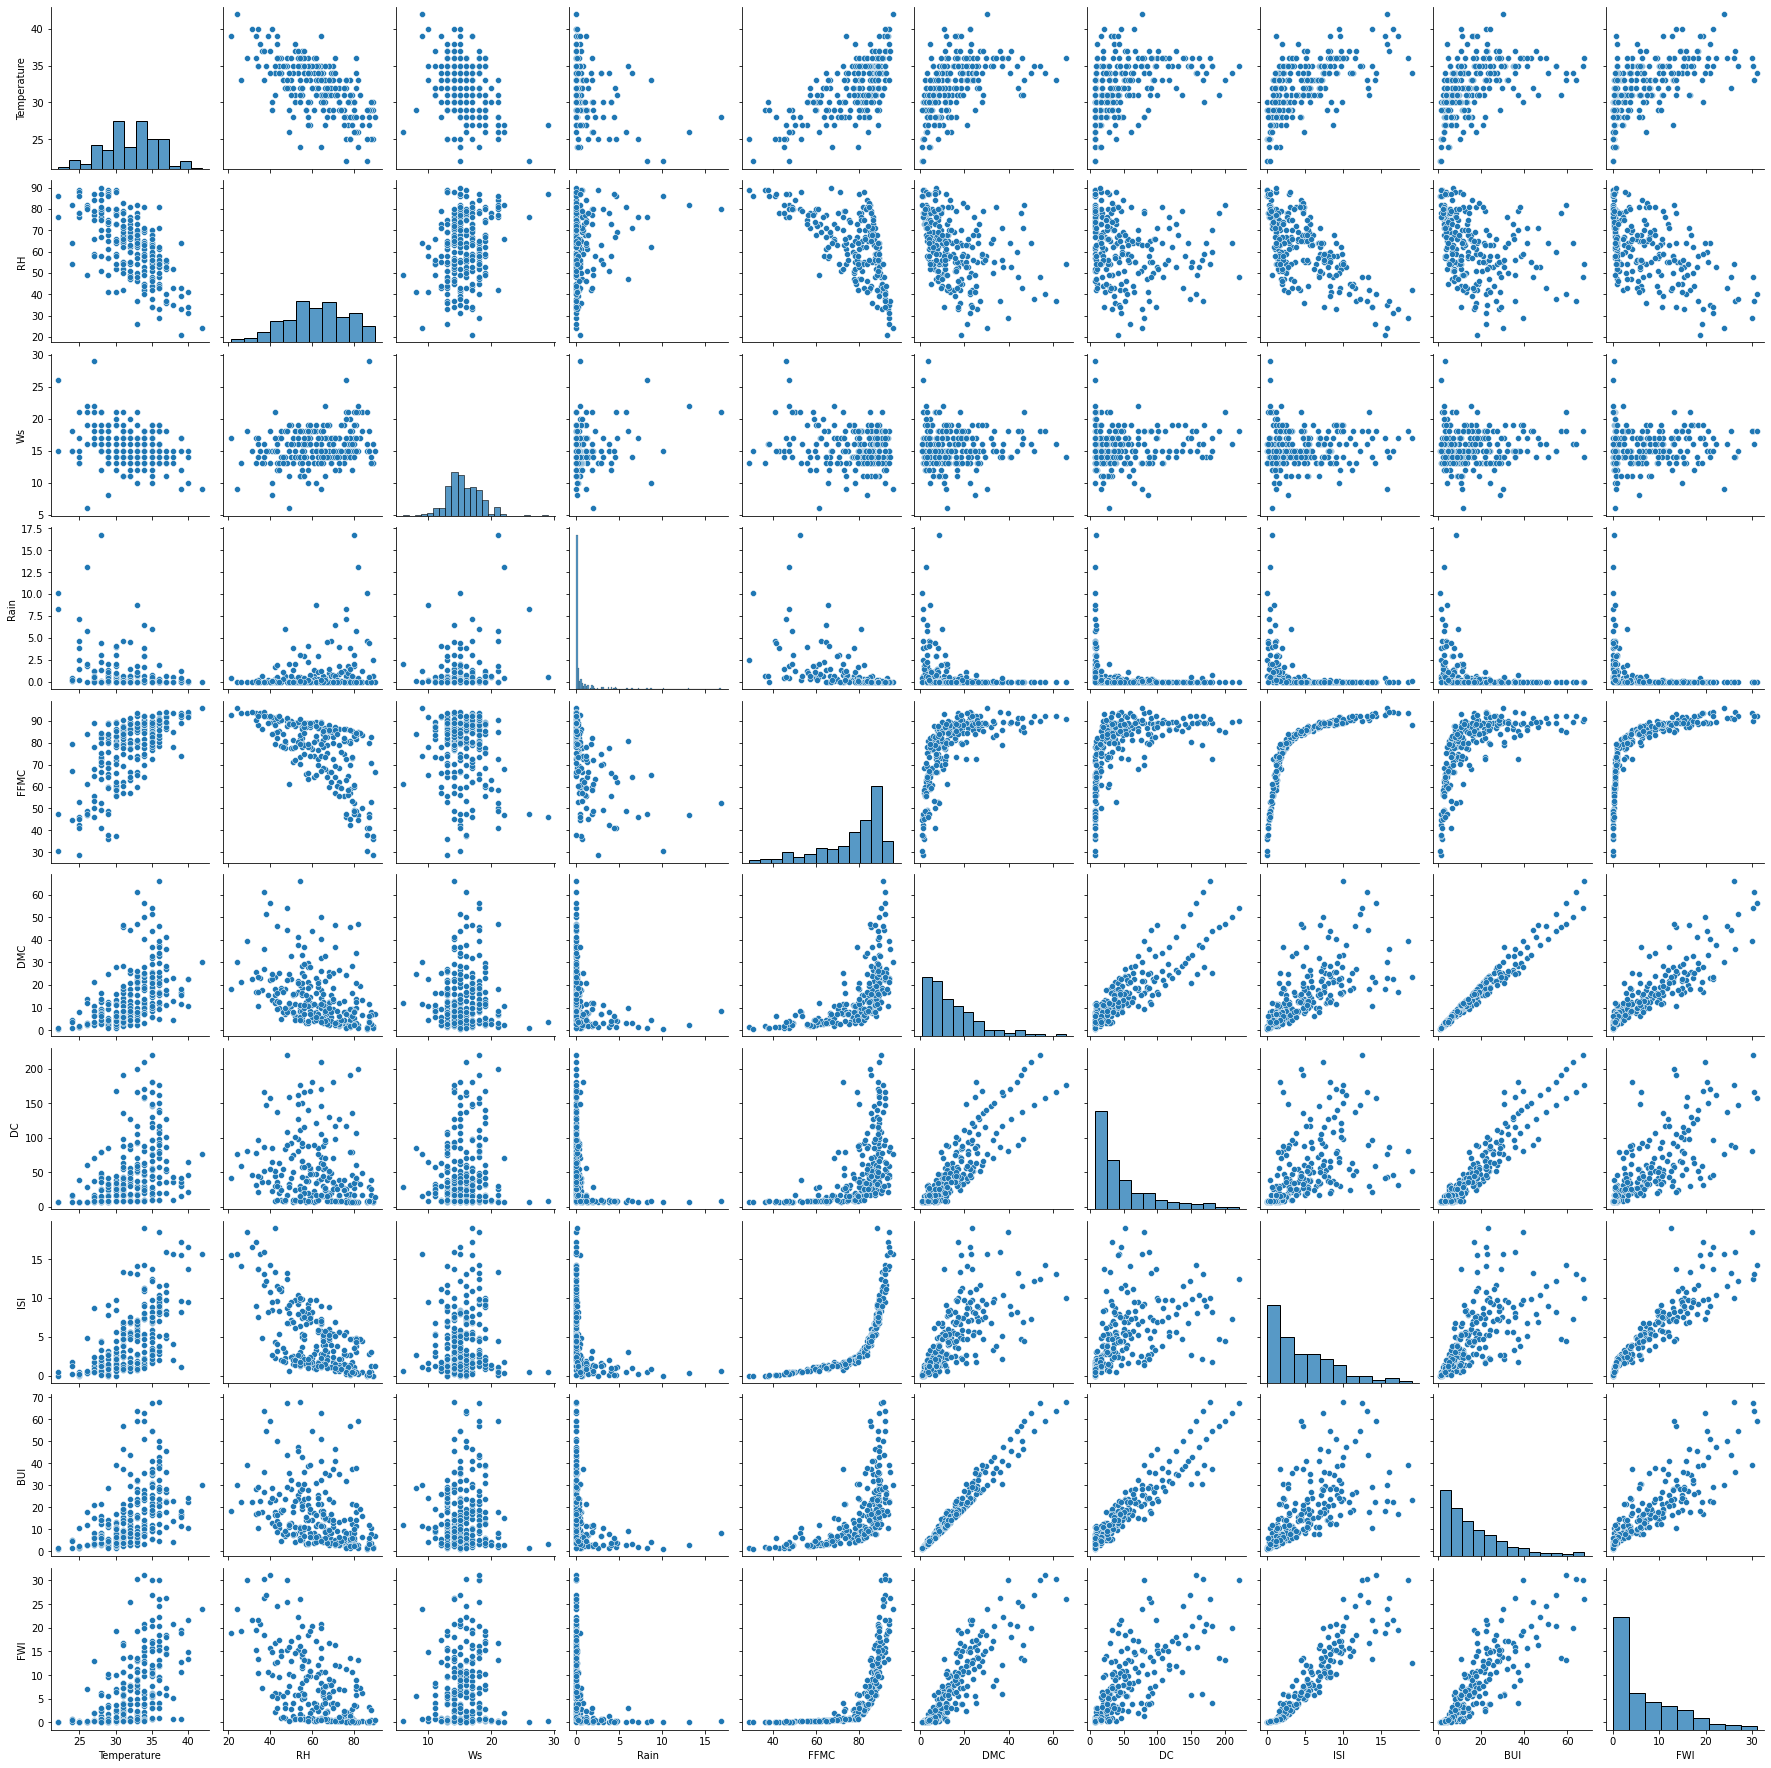

In [38]:
sns.pairplot(df)

Note: We can see a linear relation between DMC,DC,ISI,BUI,FWI

<AxesSubplot:>

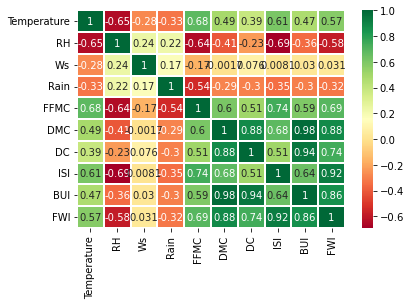

In [39]:
# Checking the correlation between features
plt.Figure(figsize=(20,6))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,linewidths=0.3,cmap="RdYlGn",annot=True)

Note: There is a high correlation between DMC & BUI

# Data Preprocessing

# a.Handling of null values using imputer

In [40]:
#Cretaing function to impute the null values in the features based on its data type
def impute(col,df):
    if df[col].dtypes=="o":
        df[col]=df[col].fillna(df[col].mode())
    else:
        df[col]=df[col].fillna(df[col].median())

In [41]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire


In [42]:
df.isna().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        2
dtype: int64

In [43]:
# TChecking the unique value of day column
df["day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', nan,
       'Sidi-Bel Abbes Region Dataset'], dtype=object)

In [44]:
# Checking the row index
df[df["day"]=='Sidi-Bel Abbes Region Dataset']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# droping that perticular index row
df=df.drop(index=123)

In [46]:
#Imputing the null values
cols=['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for i in cols:
    if df[i].isna:
        impute(i,df)

In [47]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire


In [48]:
#Checking the index 
df[df["Classes"].isna()].index

Int64Index([122], dtype='int64')

In [49]:
df["month"].unique()

array(['6', '7', '8', '9', 8.0], dtype=object)

In [50]:
# replacing 8.0 with '8'
df.iloc[122,1]='8'

In [51]:
df_class=df[df["month"]=='8']

In [52]:
df_class["Classes"].value_counts()

fire       51
notfire    11
Name: Classes, dtype: int64

In [53]:
df.iloc[122,13]='fire'

In [54]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

# b. Handling of outliers 

In [55]:
# Handling of outliers 

def outlier_handling(cols,df):
    Q1=np.percentile(df[cols],25,interpolation="midpoint")
    Q3=np.percentile(df[cols],75,interpolation="midpoint")
    IQR=Q3-Q1
    low_lim=Q1-(1.5* IQR)
    up_lim=Q3+(1.5* IQR)
    df[cols]=np.where(df[cols]>up_lim,up_lim,(np.where(df[cols]<low_lim,low_lim,df[cols])))

In [56]:
cols=['Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for i in cols:
    outlier_handling(i,df)

Text(0.5, 1.0, 'Visualization of Outliers')

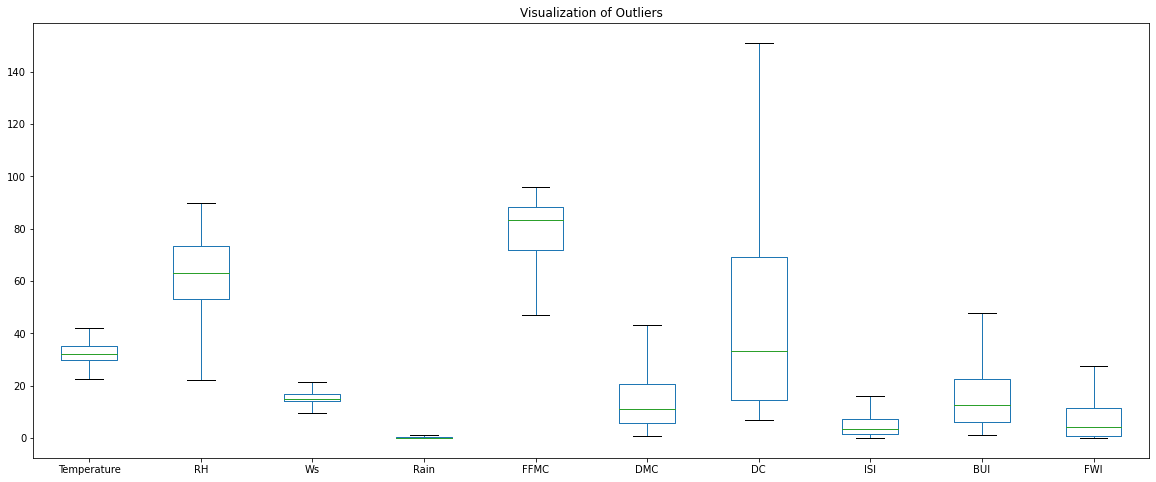

In [57]:
df.boxplot(grid=False,figsize=(20,8))
plt.title('Visualization of Outliers')

Note: Outliers has been removed from the dataset

# c. Encoding the Class Feature

In [58]:
df["Classes"].value_counts()

fire       137
notfire    106
Name: Classes, dtype: int64

In [59]:
df["Classes"]=df["Classes"].map({"fire":1,"notfire":0})

In [60]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [61]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29.0,57.0,18.0,0.00,65.700,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29.0,61.0,13.0,1.25,64.400,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26.0,82.0,21.5,1.25,47.175,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25.0,89.0,13.0,1.25,47.175,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27.0,77.0,16.0,0.00,64.800,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30.0,65.0,14.0,0.00,85.400,16.0,44.5,4.5,16.9,6.5,1
243,27,9,2012,28.0,87.0,15.0,1.25,47.175,6.5,8.0,0.1,6.2,0.0,0
244,28,9,2012,27.0,87.0,21.5,0.50,47.175,3.5,7.9,0.4,3.4,0.2,0
245,29,9,2012,24.0,54.0,18.0,0.10,79.700,4.3,15.2,1.7,5.1,0.7,0


# Feature Reduction

In [62]:
df["year"].value_counts()

2012      242
2012.0      1
Name: year, dtype: int64

In [76]:
# We can go for droping the above feature
df.drop("year",axis=1,inplace=True)

In [64]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29.0,57.0,18.0,0.00,65.700,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29.0,61.0,13.0,1.25,64.400,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26.0,82.0,21.5,1.25,47.175,2.5,7.1,0.3,2.7,0.1,0


In [77]:
# Checking the feature importance using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [78]:
# Splitting data inti dependant & Indpendant Features
y=df["Classes"]
x=df.drop("Classes",axis=1)

In [79]:
# Splitting the data into train & Test set
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((194, 12), (49, 12), (194,), (49,))

In [82]:
rdm=RandomForestClassifier()

In [83]:
rdm.fit(x_train,y_train)

RandomForestClassifier()

In [84]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [85]:
feature=pd.DataFrame()
feature["Columns"]=['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI']
feature["importance"]=rdm.feature_importances_


In [86]:
feature.sort_values(by="importance",ascending=False)

,Columns,importance
9,ISI,0.323436
6,FFMC,0.284613
11,FWI,0.146341
7,DMC,0.080033
5,Rain,0.047932
8,DC,0.038313
10,BUI,0.032296
3,RH,0.021811
2,Temperature,0.016009
4,Ws,0.003923


# Modeling

In [87]:
from sklearn.linear_model import LogisticRegression

In [89]:
y=df["Classes"]
x=df.drop("Classes",axis=1)

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [95]:
y_pred=lg.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1], dtype=int64)

In [101]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix

In [99]:
print(f1_score(y_pred,y_test))

0.9818181818181818


In [100]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.96      0.98        28

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



In [102]:
confusion_matrix(y_pred,y_test)

array([[21,  0],
       [ 1, 27]], dtype=int64)